In [4]:
#Import all the necessary libraries here
import numpy as np
import pandas as pd
import seaborn as sns

# Footwear
The given dataset contains the profits generated(in %) by all the suppliers of a footwear company in 4 major cities of India - Delhi, Mumbai, Jaipur and Hyderabad. The company wants to invest more money in the city that is showing the most promise. Analyse the dataset and answer the following questions.

In [5]:
#loading data
df=pd.read_csv("Footwear_v2.csv")

In [6]:
df.head()

,Supplier,Delhi,Mumbai,Jaipur,Hyderabad
0,Supplier 1,4.57%,4.18%,7.90%,8.54%
1,supplier 2,2.60%,1.88%,8.99%,9.23%
2,supplier 3,2.26%,7.48%,6.71%,7.84%
3,supplier 4,6.47%,6.70%,7.94%,9.89%
4,supplier 5,6.82%,1.17%,8.54%,5.67%


In [7]:
#first we check the info and clean the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
Supplier     30 non-null object
Delhi        30 non-null object
Mumbai       30 non-null object
Jaipur       30 non-null object
Hyderabad    30 non-null object
dtypes: object(5)
memory usage: 1.2+ KB


In [8]:
#we note that there are no null values, and the values are treated as objects and not floats, we will have to clean the 
# '%' sign at the end of all and change it to float
#we will write a function to do this like the last session
def clean(string):
    clean="".join(filter(lambda x: x!='%', string))
    return float(clean)

# you can also use replace
# def clean(val):
#    return float(val.replace("%",""))
#

In [9]:
# we also see the supplier column has few 'S' as upper case and few lowercase
#lets clean that too
def supply_cleaner(string):
    return string.lower()

In [10]:
#clean the df
df['Supplier']=df['Supplier'].apply(supply_cleaner)
df['Mumbai']=df['Mumbai'].apply(clean)
df['Delhi']=df['Delhi'].apply(clean)
df['Jaipur']=df['Jaipur'].apply(clean)
df['Hyderabad']=df['Hyderabad'].apply(clean)

## 1. Average
Q1)The absolute difference in the average profit percentages of Delhi and Mumbai comes out to be approximately ____

a) 1.67

b) 1.57

$\color{green} {c)\,1.77}$

d) 1.47


In [11]:
#Solution Q1
#We simply call desctibe on df
df.describe()

,Delhi,Mumbai,Jaipur,Hyderabad
count,30.000000,30.000000,30.000000,30.000000
mean,6.324000,4.555000,7.695667,7.727667
std,2.095982,2.519117,1.586503,2.477642
min,2.260000,0.290000,3.400000,1.370000
25%,5.237500,2.432500,7.017500,6.110000
50%,6.000000,4.020000,7.920000,8.305000
75%,6.782500,6.335000,8.980000,9.135000
max,11.960000,9.850000,9.870000,12.310000


In [12]:
6.324-4.555

1.7690000000000001

We notice that the difference in average is 6.324-4.555=__1.77__

## 2. Invest More
Q2) Which city amongst the four should the company invest more money in?

Hint: You need to see which city is showing most consistency in profits

a) Delhi

b) Mumbai

$\color{green} {c)\,Jaipur}$

d) Hyderabad



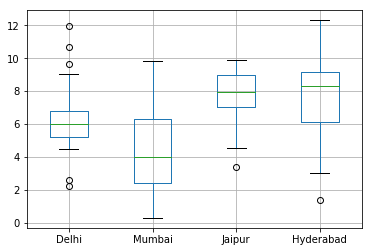

In [13]:
sub_df=df[['Delhi', 'Mumbai', 'Jaipur', 'Hyderabad']]

sub_df.boxplot()

As you can see, the only two logical choices are Jaipur and Hyd. We choose __Jaipur__ because its IQR is is more consistent and higher.

# Crypto Currencies

The following datasets contain the prices of some popular cryptocurrencies such as bitcoin, litecoin, ethereum, monero, neo, quantum and ripple.Now, you would like to know how the prices of these currencies vary with each other.

The datasets containing their price values over several days is mentioned. The attributes are as follows:

- Date - The date of trading
- Open - Opening Price
- High - Highest Price
- Low - Lowest Price
- Close - Closing Price
-  Volume - Total Volume
- Market Cap- Market Capitalisation




## 1. Correct Statements
Q1) Combine all the datasets by merging on the date column and create a dataframe with only the closing prices for all the currencies. Next, create a pair plot with all these columns and choose the correct statements from the given ones:

I)There is a good trend between litecoin and monero, one increases as the other

II)There is a weak trend between bitcoin and neo.

$\color{green} {a) I}$

b) II

c)Both I and II

d) None of the above.


In [12]:
#Import all the datasets here and combine the datasets here.

# reading cryptocurrency files
btc = pd.read_csv("crypto_data/bitcoin_price.csv")
ether = pd.read_csv("crypto_data/ethereum_price.csv")
ltc = pd.read_csv("crypto_data/litecoin_price.csv")
monero = pd.read_csv("crypto_data/monero_price.csv")
neo = pd.read_csv("crypto_data/neo_price.csv")
quantum = pd.read_csv("crypto_data/qtum_price.csv")
ripple = pd.read_csv("crypto_data/ripple_price.csv")

# putting a suffix with column names so that joins are easy
btc.columns = btc.columns.map(lambda x: str(x) + '_btc')
ether.columns = ether.columns.map(lambda x: str(x) + '_et')
ltc.columns = ltc.columns.map(lambda x: str(x) + '_ltc')
monero.columns = monero.columns.map(lambda x: str(x) + '_mon')
neo.columns = neo.columns.map(lambda x: str(x) + '_neo')
quantum.columns = quantum.columns.map(lambda x: str(x) + '_qt')
ripple.columns = ripple.columns.map(lambda x: str(x) + '_rip')

In [13]:
btc.head()

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [14]:
# merging all the files by date
m1 = pd.merge(btc, ether, how="inner", left_on="Date_btc", right_on="Date_et")
m2 = pd.merge(m1, ltc, how="inner", left_on="Date_btc", right_on="Date_ltc")
m3 = pd.merge(m2, monero, how="inner", left_on="Date_btc", right_on="Date_mon")
m4 = pd.merge(m3, neo, how="inner", left_on="Date_btc", right_on="Date_neo")
m5 = pd.merge(m4, quantum, how="inner", left_on="Date_btc", right_on="Date_qt")
crypto = pd.merge(m5, ripple, how="inner", left_on="Date_btc", right_on="Date_rip")

In [15]:
# Subsetting only the closing prices column for plotting
curr = crypto[["Close_btc", "Close_et", 'Close_ltc', "Close_mon", "Close_neo", "Close_qt"]]
curr.head()

,Close_btc,Close_et,Close_ltc,Close_mon,Close_neo,Close_qt
0,7144.38,294.66,61.30,99.76,26.23,11.21
1,7022.76,298.89,55.17,102.92,26.32,10.44
2,7407.41,296.26,54.75,86.35,26.38,10.13
3,7379.95,300.47,55.04,87.30,26.49,10.05
4,7207.76,305.71,56.18,87.99,26.82,10.38


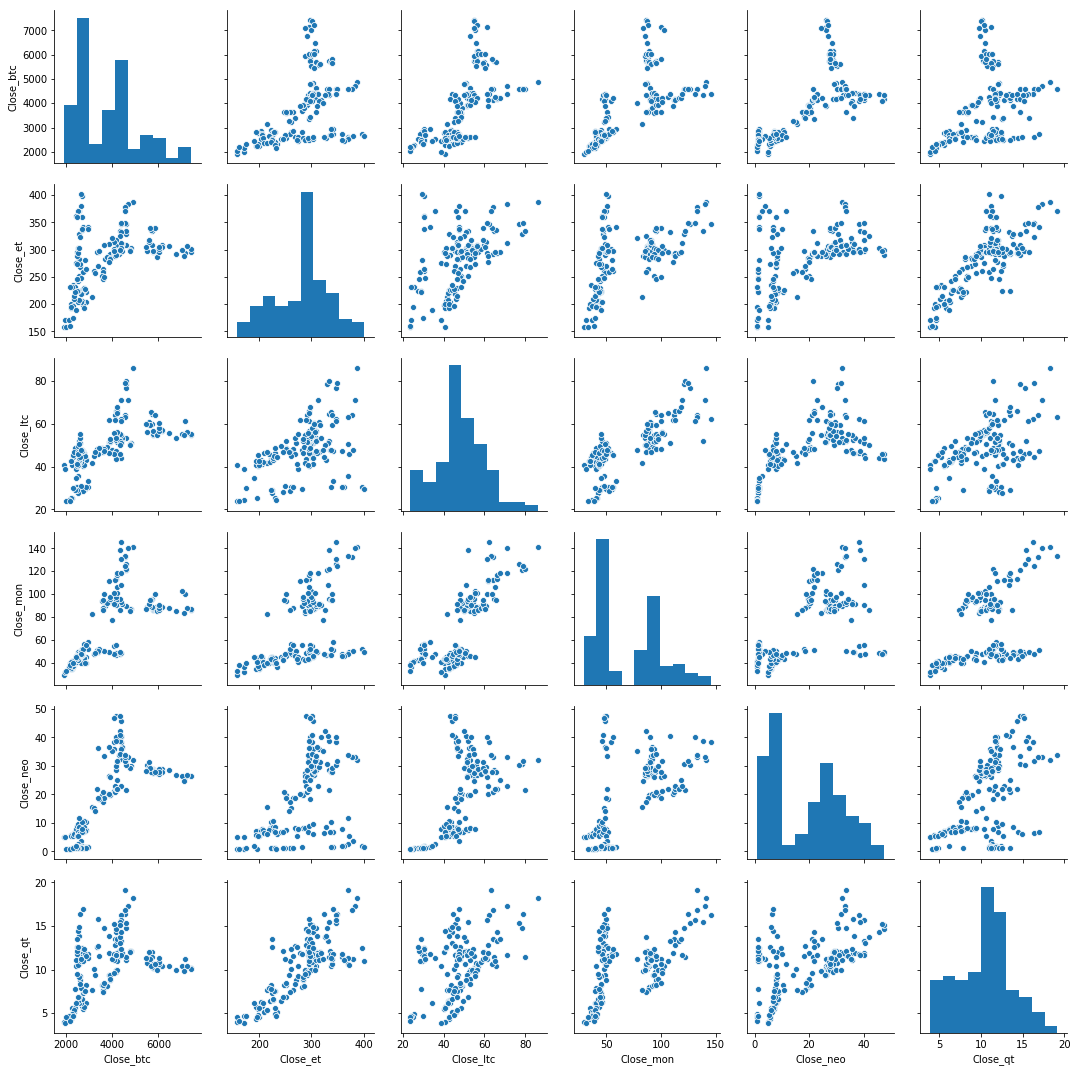

In [16]:
sns.pairplot(curr)

As you can see the corelation between Close_ltc and Close_mon is positive and a good trend

And Close_btc and Close_neo also show a strong trend positive line

## 2. Heatmap
Q2)As mentioned earlier, Heat Maps are predominantly utilised for analysing Correlation Matrix. A high positive correlation (values near 1) means a good positive trend - if one increases, then the other also increases. A negative correlation on the other hand(values near -1) indicate good negative trend - if one increases, then the other decreases. A value near 0 indicates no correlation, as in one variable doesn’t affect the other. 

Here, you can create a correlation matrix of the closing prices by passing the df.corr() function and storing it in a variable.  After that use this variable to plot a heatmap and choose the correct option. 

Check out this link for creating a correlation matrix:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


$\color{green} {a)\,Ethereum\,and\,Quantum\,have\,high\,correlation }$

b)Neo and Bitcoin have pretty low correlation

$\color{green} {c)\,Ethereum\,has\,similar\,correlation\,with\,litecoin\,and\,neo}$



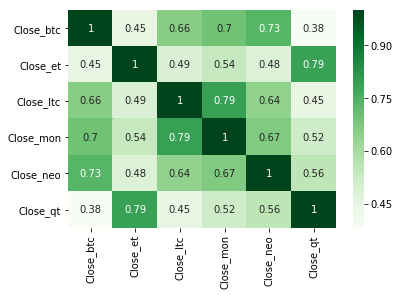

In [17]:
#Your code here
cor = curr.corr()
round(cor, 3)
sns.heatmap(cor, cmap="Greens", annot=True)

Close_et and Close_qt have high corr (0.79)

Close_neo and Close_btc have a high corr (0.73)

Close_et and Close_ltc have corr of (0.49)

Close_et and Close_neo have a corr of (0.48)